In [47]:
import sys  
sys.path.append("../../")
from LIB.utils import * 

In [48]:

v="v6"

train_df=pd.read_csv("../features/train_{}.csv".format(v))
test_df=pd.read_csv("../features/test_{}.csv".format(v))

In [49]:
# train_df.Sales_first_7_days=np.log1p(train_df.Sales_first_7_days)
# test_df.Sales_first_7_days=np.log1p(test_df.Sales_first_7_days)

In [50]:
keys= ["ID"]
Target_name="target_log"
not_used_cols=["ID",'sku_hash', 'product_type', 'product_gender',
       'macro_function', 'function', 'sub_function', 'model',
       'aesthetic_sub_line', 'macro_material', 'fr_FR_price',
       'en_US_description', 'target', 'target_log',
                'ratio_function_month1_2',
  'ratio_function_month2_3',
  'ratio_function_month1_3',"ratio","count_sales_per_month",
            
              "price_ratio","color",
#                "Sales_last_days"
               
              ]
    

feautres_name=[ f for f in test_df.columns if f not in not_used_cols]
from sklearn.metrics import mean_squared_error
def eval_metrics(y_ture,y_hat):
    return np.sqrt(mean_squared_error(y_ture,y_hat))


In [51]:
len(feautres_name),feautres_name

(97,
 ['month',
  'target_log_by_product_type_mean',
  'target_log_by_product_type_min',
  'target_log_by_product_type_std',
  'target_log_by_product_gender_mean',
  'target_log_by_product_gender_min',
  'target_log_by_product_gender_std',
  'target_log_by_macro_function_mean',
  'target_log_by_macro_function_min',
  'target_log_by_macro_function_std',
  'target_log_by_function_mean',
  'target_log_by_function_min',
  'target_log_by_function_std',
  'target_log_by_sub_function_mean',
  'target_log_by_sub_function_min',
  'target_log_by_sub_function_std',
  'target_log_by_aesthetic_sub_line_mean',
  'target_log_by_aesthetic_sub_line_min',
  'target_log_by_aesthetic_sub_line_std',
  'target_log_by_macro_material_mean',
  'target_log_by_macro_material_min',
  'target_log_by_macro_material_std',
  'type_tf_idf_pca_0',
  'type_tf_idf_pca_1',
  'type_tf_idf_pca_2',
  'type_tf_idf_pca_3',
  'type_tf_idf_pca_4',
  'type_tf_idf_pca_5',
  'type_tf_idf_pca_6',
  'type_tf_idf_pca_7',
  'type_tf_id

In [52]:
from LIB.xgb import * 
# params= {'min_child_weight': 10, 'eta': 0.004, 'colsample_bytree': 0.75, 'max_depth': 8,
#             'subsample': 0.9, 'lambda': 4, 'nthread': 8, 'booster' : 'gbtree', 'silent': 1,
#             'eval_metric': 'rmse', 'objective': 'reg:linear',"gamma":0.3 ,"alpha":0.02}
# 0.41
params= {
    'min_child_weight': 10, 
         'eta': 0.004, 'colsample_bytree': 0.65, 'max_depth': 8,
            'subsample': 0.8, 'lambda': 5, 'nthread': 8, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear',"gamma":0.4 ,"alpha":0.02}


# params= {'min_child_weight': 10, 'eta': 0.004, 'colsample_bytree': 0.7, 'max_depth': 9,
#             'subsample': 0.9, 'lambda': 5, 'nthread': 8, 'booster' : 'gbtree', 'silent': 1,
#             'eval_metric': 'rmse', 'objective': 'reg:linear',"gamma":0.5 ,"alpha":0.04}
XGBoost= Xgboost_model( Train_df=train_df,
                        Test_df=test_df,
                        feval_metrics=eval_metrics,
                        Target_name=Target_name,
                        params=params,
                        feature_names=feautres_name,
                        keys=keys,
                        verbose_eval=100,
                        early_stopping_rounds=50,
                        num_boost_round=20000,
                        maximize=False,
                        test_size=0.1,
                        nbr_fold=5,
                        nbr_run=1)

Shape of Train (5298, 112)
Shape of Test (5166, 110)


In [53]:
train_pred_xgboost,test_pred_xgboost=XGBoost.Xgboost_Kfold()


##################################################fold:1##################################################
run 0 train metrics :0.19776484 val metrics : 0.3881164

fold-1 train metrics :0.19776484 val metrics : 0.3881164
##################################################fold:2##################################################
run 0 train metrics :0.19113149 val metrics : 0.41726482

fold-2 train metrics :0.19113149 val metrics : 0.41726482
##################################################fold:3##################################################
run 0 train metrics :0.19525896 val metrics : 0.46390647

fold-3 train metrics :0.19525896 val metrics : 0.46390647
##################################################fold:4##################################################
run 0 train metrics :0.19256613 val metrics : 0.40403613

fold-4 train metrics :0.19256613 val metrics : 0.40403613
##################################################fold:5##################################################
run

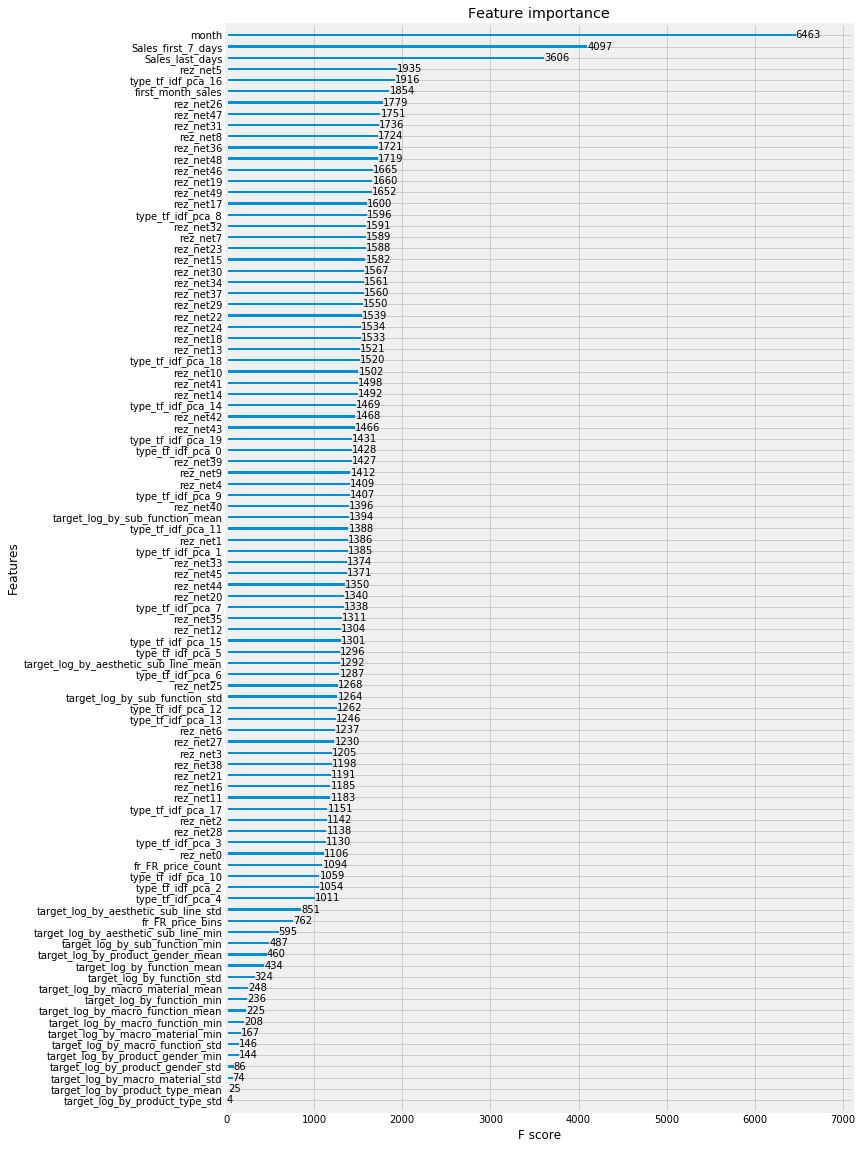

In [54]:
XGBoost.plot_importance(figsize=(10,20))

In [55]:
test_pred_xgboost["target"]=np.expm1(test_pred_xgboost.target_log).round()

In [56]:
# test_pred_xgboost["target"]=test_pred_xgboost.target_log

In [57]:
test_pred_xgboost[["ID","target"]].to_csv("../sub/bins_20.csv",index=False)

In [ ]:
1